In [2]:
%pip install scikit-learn

     ---------------------------------------- 8.3/8.3 MB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 14.8/14.8 MB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 42.2/42.2 MB 7.0 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 9.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
%pip install pandas

     ---------------------------------------- 10.6/10.6 MB 6.9 MB/s eta 0:00:00
     -------------------------------------- 502.3/502.3 kB 7.9 MB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 kB 5.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
%pip install matplotlib


     ---------------------------------------- 7.6/7.6 MB 6.3 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB ? eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 5.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
import sys
sys.path.insert(0, '../../..')

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.datasets import make_classification, make_moons
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
def evaluate_classification(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    return accuracy, report, confusion

In [9]:
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision boundary')

In [10]:
def plot_data(X, y):
    plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Class 0')
    plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

In [11]:
class NeuralNet:
    def __init__(self, normalize = True, learning_rate = 0.01, num_iter = 30000):
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.normalize = normalize
    
    def __normalize(self, X, mean = None, std = None):
        n = X.shape[0]
        m = mean
        if m is None:
            m = np.mean(X, axis=1).reshape((n, 1))
        s = std
        if s is None:
            s = np.std(X, axis=1).reshape((n, 1))
        X_new = (X - m) / s
        return X_new, m, s

    def __sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
    
    def __initialize_parameters(self, n_x, n_1):
        W1 = np.random.randn(n_1, n_x) * 0.01
        b1 = np.zeros((n_1, 1))
        W2 = np.random.randn(1, n_1) * 0.01
        b2 = 0 # у вихідному шарі лише 1 нейрон
        self.parameters = {"W1" : W1, "b1" : b1, "W2" : W2, "b2" : b2}
       
    def __forward_propagation(self, X):
        W1 = self.parameters["W1"]
        b1 = self.parameters["b1"]
        W2 = self.parameters["W2"]
        b2 = self.parameters["b2"]

        Z1 = np.dot(W1, X) + b1
        A1 = self.__sigmoid(Z1)

        Z2 = np.dot(W2, A1) + b2
        A2 = self.__sigmoid(Z2)

        
        cache = (W1, b1, W2, b2, Z1, A1, Z2, A2)

        return A2, cache
    
    def compute_cost(self, A, Y):
        m = Y.shape[1]
        res = Y * np.log(A) + (1 - Y) * np.log(1 - A)
        J = -(1 / m) * np.sum(res)
        return J
        
    def __backward_propagation(self, X, Y, cache):
        m = X.shape[1]
        n = X.shape[0]
        (W1, b1, W2, b2, Z1, A1, Z2, A2) = cache
        
        dZ2 = A2 - Y
        dW2 = 1. / m * np.dot(dZ2, A1.T)
        db2 = 1. / m * np.sum(dZ2, axis = 1, keepdims = True)
        
        dA1 = np.dot(W2.T, dZ2)
        dZ1 = np.multiply(dA1, np.multiply(A1, 1 - A1))
        dW1 = 1. / m * np.dot(dZ1, X.T)
        db1 = 1. / m * np.sum(dZ1, axis = 1, keepdims = True)
        

        grads = {"dZ1" : dZ1, "dW1" : dW1, "db1" : db1, "dZ2" : dZ2, "dW2" : dW2, "db2" : db2}
        return grads
    
    def __update_parameters(self, grads):
        W1 = self.parameters["W1"]
        b1 = self.parameters["b1"]
        W2 = self.parameters["W2"]
        b2 = self.parameters["b2"]

        dW1 = grads["dW1"]
        db1 = grads["db1"]
        dW2 = grads["dW2"]
        db2 = grads["db2"]
        

        self.parameters["W1"] = W1 - self.learning_rate * dW1
        self.parameters["b1"] = b1 - self.learning_rate * db1
        self.parameters["W2"] = W2 - self.learning_rate * dW2
        self.parameters["b2"] = b2 - self.learning_rate * db2

        
    def fit(self, X_vert, Y_vert, print_cost = True):
        
        X, Y = X_vert.T, Y_vert.T
        
        if self.normalize:
            X, self.__mean, self.__std = self.__normalize(X)
        
        costs = []
        
        m = X.shape[1]
        n_x = X.shape[0]
        
        self.__initialize_parameters(n_x, 20)

        for i in range(self.num_iter):
            A, cache = self.__forward_propagation(X)

            cost = self.compute_cost(A, Y)

            grads = self.__backward_propagation(X, Y, cache)

            self.__update_parameters(grads)

            if print_cost and i % 1000 == 0:
                print("{}-th iteration: {}".format(i, cost))

            if i % 1000 == 0:
                costs.append(cost)

        if print_cost:
            plt.plot(costs)
            plt.ylabel("Cost")
            plt.xlabel("Iteration, *1000")
            plt.show()
    
    def predict_proba(self, X_vert):
        X = X_vert.T
        if self.normalize:
            X, _, _ = self.__normalize(X, self.__mean, self.__std)
        
        probs = self.__forward_propagation(X)[0]
        
        return np.column_stack((1 - probs.T, probs.T))
    
    def predict(self, X_vert):
        positive_probs = self.predict_proba(X_vert)[:, 1]
        return (positive_probs >= 0.5).astype(int)  

# Симульовані дані 1

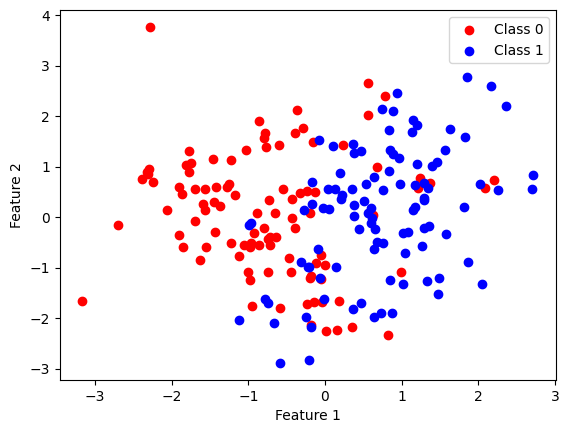

0-th iteration: 0.6933879199970807
1000-th iteration: 0.6925595648165476
2000-th iteration: 0.6914964938844481
3000-th iteration: 0.6866006439826845
4000-th iteration: 0.6656508357527389
5000-th iteration: 0.6028432438054646
6000-th iteration: 0.5182121374772731
7000-th iteration: 0.46960355597445597
8000-th iteration: 0.45073500926971094
9000-th iteration: 0.44381259958908736
10000-th iteration: 0.44118803718460314
11000-th iteration: 0.44012521420620204
12000-th iteration: 0.4396398496835991
13000-th iteration: 0.43937053730840037
14000-th iteration: 0.4391826738096368
15000-th iteration: 0.4390255113391904
16000-th iteration: 0.4388795401394028
17000-th iteration: 0.43873690467694576
18000-th iteration: 0.4385940625070804
19000-th iteration: 0.4384490141398084
20000-th iteration: 0.43830024727679034
21000-th iteration: 0.4381463265299077
22000-th iteration: 0.4379857283147513
23000-th iteration: 0.4378167721520715
24000-th iteration: 0.43763759492252696
25000-th iteration: 0.4374461

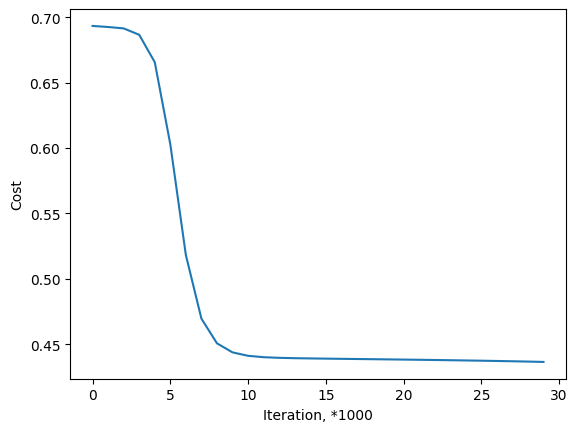

Accuracy: 
0.775
Report: 
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        22
           1       0.71      0.83      0.77        18

    accuracy                           0.78        40
   macro avg       0.78      0.78      0.77        40
weighted avg       0.78      0.78      0.78        40

Confusion: 
[[16  6]
 [ 3 15]]


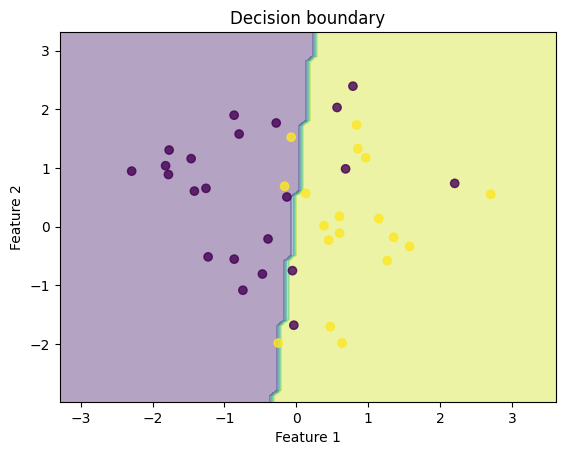

In [12]:
X, y = make_classification(n_samples = 200, n_classes = 2, n_features = 2, 
                           n_informative=2, n_redundant=0, random_state = 42,
                           flip_y=0.02, class_sep=0.8)
plot_data(X, y)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1,1), test_size=0.2, random_state=42)

nn = NeuralNet()
nn.fit(X_train, y_train)

y_test_pred = nn.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(nn, X_test, y_test)
plt.show()

# Симульовані дані 2

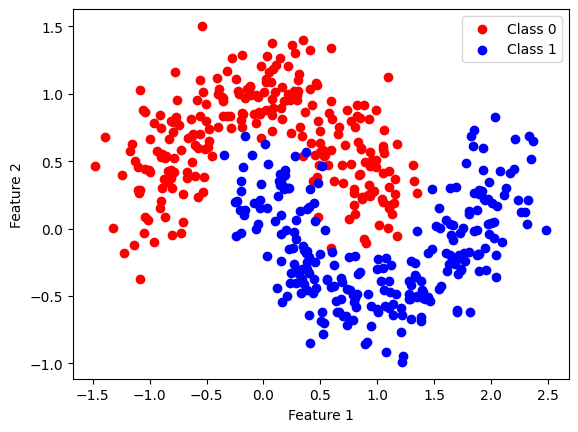

0-th iteration: 0.6930330123703721
1000-th iteration: 0.28187246799763194
2000-th iteration: 0.2810393782044588
3000-th iteration: 0.28063543843212185
4000-th iteration: 0.2803839630655614
5000-th iteration: 0.28020570469138645
6000-th iteration: 0.280065883876284
7000-th iteration: 0.2799426048689958
8000-th iteration: 0.27980872434018006
9000-th iteration: 0.27956063539407144
10000-th iteration: 0.27743966179229357
11000-th iteration: 0.258084348065084
12000-th iteration: 0.24465939130777217
13000-th iteration: 0.23938624006585676
14000-th iteration: 0.23668780715706014
15000-th iteration: 0.19611864205983914
16000-th iteration: 0.11019680246275282
17000-th iteration: 0.09033151721341069
18000-th iteration: 0.08144692808117186
19000-th iteration: 0.07586784403623527
20000-th iteration: 0.07169179813412405
21000-th iteration: 0.0682485248732409
22000-th iteration: 0.06526114743985884
23000-th iteration: 0.06259910405361754
24000-th iteration: 0.060189137768616875
25000-th iteration: 0

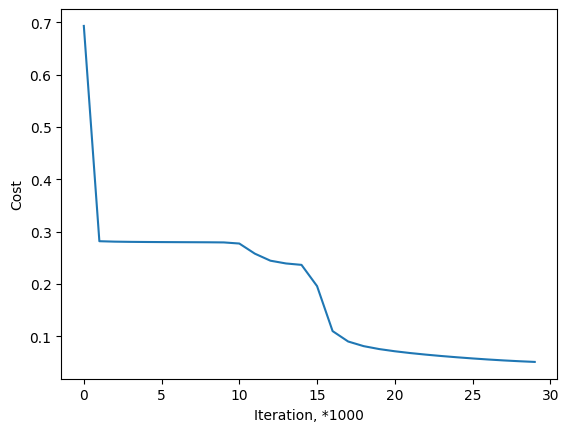

Accuracy: 
0.99
Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.98      0.99        57

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion: 
[[43  0]
 [ 1 56]]


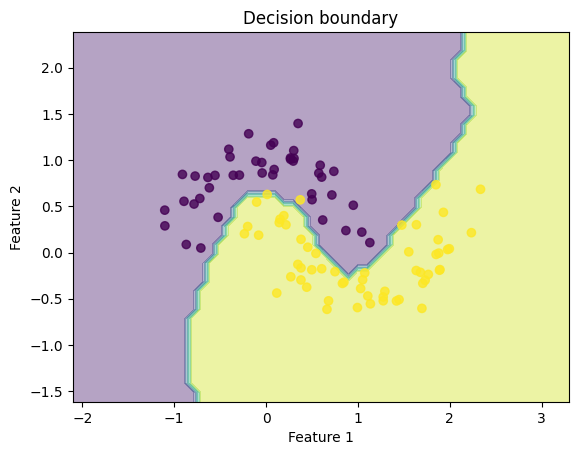

In [13]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

plot_data(X, y)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1,1), test_size=0.2, random_state=42)

nn = NeuralNet(learning_rate = 0.5)
nn.fit(X_train, y_train)

y_test_pred = nn.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(nn, X_test, y_test)
plt.show()

# Tests dataset

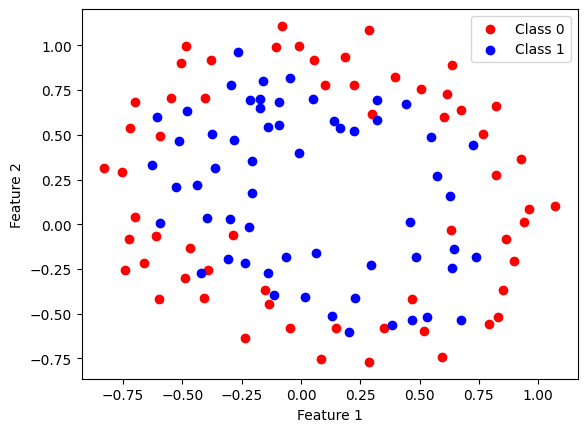

In [15]:
data_columns = ["test1", "test2"]
target_column = "passed"
df = pd.read_csv("tests.csv")
X, y = df[data_columns].values, df[target_column].values

plot_data(X, y)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1,1), test_size=0.2, random_state=42)

0-th iteration: 0.6934105757256838
1000-th iteration: 0.6890144274229468
2000-th iteration: 0.68349740000816
3000-th iteration: 0.6223071066270562
4000-th iteration: 0.610171604677388
5000-th iteration: 0.4414796794861682
6000-th iteration: 0.39005094151496483
7000-th iteration: 0.37448821743229926
8000-th iteration: 0.3551804723707337
9000-th iteration: 0.3449195009229828


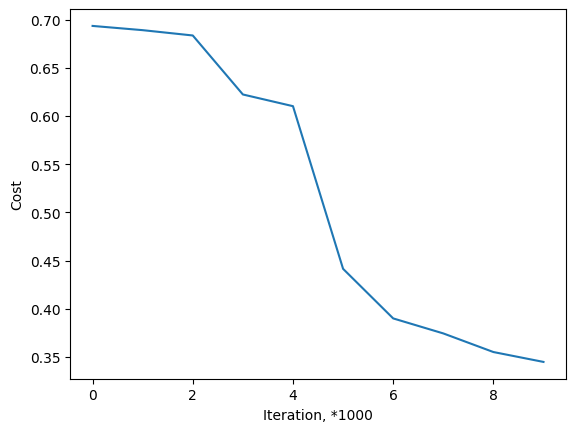

Accuracy: 
0.9166666666666666
Report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.83      0.91        12

    accuracy                           0.92        24
   macro avg       0.93      0.92      0.92        24
weighted avg       0.93      0.92      0.92        24

Confusion: 
    0   1
0  12   0
1   2  10


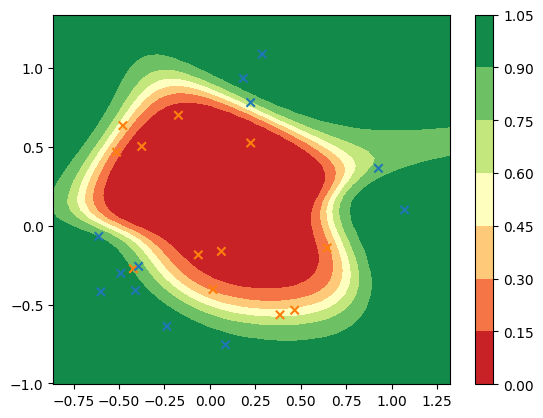

In [124]:
nn = NeuralNet(normalize = True, learning_rate = 0.5, num_iter = 10000)
nn.fit(X_train, y_train)

y_test_pred = nn.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(nn, X_test, y_test)
plt.show()

In [16]:
print(nn.parameters)

{'W1': array([[ 2.57230279e+00, -1.40804795e+00],
       [ 3.04934177e-01, -4.64786368e-01],
       [-5.92814344e-01, -2.57707307e-01],
       [-1.13088340e+00, -2.86420774e-02],
       [ 2.61396592e+00, -1.43898859e+00],
       [ 3.04905198e+00, -1.75750062e+00],
       [-7.52240737e-01, -2.77914462e-01],
       [-9.65930529e-02, -4.29370965e-01],
       [ 3.18874838e+00, -1.85141447e+00],
       [ 2.02978364e+00, -9.45095555e-01],
       [-4.59220784e+00, -1.70359717e+00],
       [ 9.68357777e-01, -2.23230821e-01],
       [-5.17680446e-01, -4.40084545e-01],
       [-7.93102956e+00,  4.41339562e+00],
       [ 1.05096633e-01,  2.58303629e-01],
       [ 6.56841787e-01, -3.81499894e-01],
       [ 1.87889075e-03, -1.24246717e+00],
       [-4.28333367e-01, -3.36413226e-01],
       [-5.42764768e-01, -2.80503294e-01],
       [ 3.19323392e+00, -1.84975499e+00]]), 'b1': array([[ 3.06362062],
       [ 0.12210373],
       [-0.59479851],
       [-1.41191515],
       [ 3.10809686],
       [ 3.5713

Зверніть увагу на границю прийняття рішення. Модель старається побудувати складну криву, що може свідчити про її перетренування. Порівняйте отримані результати з класом з sklearn. Спробуйте додати нові шари для нашого класу та порівняти результати тоді. Поекспериментуйте з гіперпараметрами для обох класів.

Accuracy: 
0.75
Report: 
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.75      0.75      0.75        12

    accuracy                           0.75        24
   macro avg       0.75      0.75      0.75        24
weighted avg       0.75      0.75      0.75        24

Confusion: 
[[9 3]
 [3 9]]


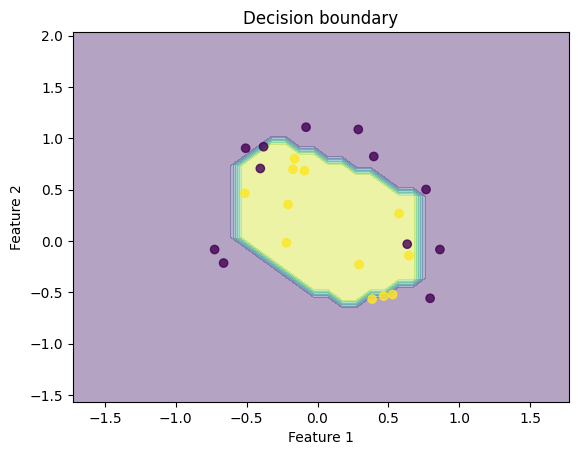

In [17]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes = (20,), max_iter = 10000)#, activation = 'logistic', solver = 'sgd', learning_rate_init = 0.01, learning_rate = 'constant')

clf.fit(X_train, y_train.ravel())
y_test_pred = clf.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(clf, X_test, y_test)
plt.show()

In [18]:
clf.n_iter_

1581